# Bike Sharing Demand

Os sistemas de compartilhamento de bicicletas são um meio de alugar bicicletas em que o processo de obtenção de adesão, aluguel e devolução de bicicletas é automatizado por meio de uma rede de quiosques espalhados pela cidade. Usando esses sistemas, as pessoas podem alugar uma bicicleta em um local e devolvê-la em um local diferente conforme necessário. Atualmente, existem mais de 500 programas de compartilhamento de bicicletas em todo o mundo.

Os dados gerados por esses sistemas os tornam atraentes para os pesquisadores porque a duração da viagem, o local de partida, o local de chegada e o tempo decorrido são explicitamente registrados. Os sistemas de compartilhamento de bicicletas funcionam, portanto, como uma rede de sensores, que pode ser utilizada para estudar a mobilidade em uma cidade. Neste projeto vamos combinar padrões históricos de uso com dados meteorológicos, a fim de prever a demanda por aluguel de bicicletas no programa Capital Bikeshare em Washington, DC.

DataFrame: https://www.kaggle.com/competitions/bike-sharing-demand

# 

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from time import time
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

In [85]:
# Carregando e visualizando o conjunto de dados do treino e teste.
dfTreinamentoOriginal = pd.read_csv(r'C:\Users\Thiago\OneDrive\Área de Trabalho\API - Modelo demanda SPARK\bd\train\train.csv')
dfTesteOriginal = pd.read_csv(r'C:\Users\Thiago\OneDrive\Área de Trabalho\API - Modelo demanda SPARK\bd\test\test.csv')
dfTreinamentoOriginal.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [86]:
dfTesteOriginal.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [87]:
print("Shape do treino {}".format(dfTreinamentoOriginal.shape))

Shape do treino (10886, 12)


In [88]:
dfTesteOriginal[dfTesteOriginal.index==0].to_dict()

{'datetime': {0: '2011-01-20 00:00:00'},
 'season': {0: 1},
 'holiday': {0: 0},
 'workingday': {0: 1},
 'weather': {0: 1},
 'temp': {0: 10.66},
 'atemp': {0: 11.365},
 'humidity': {0: 56},
 'windspeed': {0: 26.0027}}

In [89]:
# Visualizando as informações dos dados de treino.
dfTreinamentoOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Pré Processamento

In [90]:
dfTesteOriginal['datetime'].unique()

array(['2011-01-20 00:00:00', '2011-01-20 01:00:00',
       '2011-01-20 02:00:00', ..., '2012-12-31 21:00:00',
       '2012-12-31 22:00:00', '2012-12-31 23:00:00'], dtype=object)

In [91]:
dfTreinamentoOriginal['Date'] = pd.to_datetime(dfTreinamentoOriginal['datetime'], format='%Y-%m-%d %H:%M:%S')
dfTreinamentoOriginal.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [92]:
dfTreinamentoOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  Date        10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [93]:
anosDict = {2011:0, 2012:1}

In [94]:
# Transformando o Ano 2011 em 0 e 2012 em 1.
dfTreinamentoOriginal['Year'] = dfTreinamentoOriginal['Date'].dt.year
dfTreinamentoOriginal['Year'] = dfTreinamentoOriginal['Year'].map(anosDict)
dfTreinamentoOriginal.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,0


In [95]:
dfTreinamentoOriginal['Month'] = dfTreinamentoOriginal['Date'].dt.month
dfTreinamentoOriginal['Day'] = dfTreinamentoOriginal['Date'].dt.day
dfTreinamentoOriginal['Hour'] = dfTreinamentoOriginal['Date'].dt.hour
dfTreinamentoOriginal['DayName'] = dfTreinamentoOriginal['Date'].dt.day_name()
dfTreinamentoOriginal['DayNumber'] = dfTreinamentoOriginal['Date'].dt.dayofweek
dfTreinamentoOriginal.drop(columns='Date', inplace=True)
dfTreinamentoOriginal.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,DayName,DayNumber
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,0,Saturday,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,1,1,Saturday,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1,1,2,Saturday,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,1,1,3,Saturday,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,1,1,4,Saturday,5


In [96]:
dfTesteOriginal['Date'] = pd.to_datetime(dfTesteOriginal['datetime'], format='%Y/%m/%d')
dfTesteOriginal['Year'] = dfTesteOriginal['Date'].dt.year
dfTesteOriginal['Year'] = dfTesteOriginal['Year'].map(anosDict)
dfTesteOriginal['Month'] = dfTesteOriginal['Date'].dt.month
dfTesteOriginal['Day'] = dfTesteOriginal['Date'].dt.day
dfTesteOriginal['Hour'] = dfTesteOriginal['Date'].dt.hour
dfTesteOriginal['DayName'] = dfTesteOriginal['Date'].dt.day_name()
dfTesteOriginal['DayNumber'] = dfTesteOriginal['Date'].dt.dayofweek
dfTesteOriginal.drop(columns='Date', inplace=True)
dfTesteOriginal.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,DayName,DayNumber
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,20,0,Thursday,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,1,20,1,Thursday,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,1,20,2,Thursday,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20,3,Thursday,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20,4,Thursday,3


In [97]:
dfTreinamentoOriginal.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'Year', 'Month', 'Day', 'Hour', 'DayName', 'DayNumber'],
      dtype='object')

In [98]:
dfTreinamentoOriginal.rename(columns={'season': 'Seasons',
                                     'holiday': 'Holiday',
                                     'humidity': 'Humidity',
                                     'windspeed': 'Wind_Speed',
                                     'weather': 'Weather',
                                     'atemp': 'aTemperature',
                                     'temp': 'Temperature',
                                     'casual': 'Casual',
                                     'registered': 'Registered',
                                     'workingday': 'WorkingDay'}, inplace=True)
dfTreinamentoOriginal.head()

,datetime,Seasons,Holiday,WorkingDay,Weather,Temperature,aTemperature,Humidity,Wind_Speed,Casual,Registered,count,Year,Month,Day,Hour,DayName,DayNumber
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,0,Saturday,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,1,1,Saturday,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1,1,2,Saturday,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,1,1,3,Saturday,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,1,1,4,Saturday,5


In [99]:
dfTesteOriginal.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Year', 'Month', 'Day', 'Hour',
       'DayName', 'DayNumber'],
      dtype='object')

In [100]:
dfTesteOriginal.rename(columns={'season': 'Seasons',
                                     'holiday': 'Holiday',
                                     'humidity': 'Humidity',
                                     'windspeed': 'Wind_Speed',
                                     'weather': 'Weather',
                                     'atemp': 'aTemperature',
                                     'temp': 'Temperature',
                                     'workingday': 'WorkingDay'}, inplace=True)
dfTesteOriginal.head()

,datetime,Seasons,Holiday,WorkingDay,Weather,Temperature,aTemperature,Humidity,Wind_Speed,Year,Month,Day,Hour,DayName,DayNumber
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,20,0,Thursday,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,1,20,1,Thursday,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,1,20,2,Thursday,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20,3,Thursday,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20,4,Thursday,3


In [101]:
### Ordenar as colunas em uma ordem específica
dfTreinamentoOriginal = dfTreinamentoOriginal[['datetime', 'Year', 'Month', 'Day', 'DayName', 'DayNumber',
                                              'Hour', 'Weather', 'Temperature', 'Humidity', 'Wind_Speed',
                                              'Seasons', 'Holiday', 'WorkingDay', 'count', 'Casual', 'Registered']]
dfTreinamentoOriginal.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered
0,2011-01-01 00:00:00,0,1,1,Saturday,5,0,1,9.84,81,0.0,1,0,0,16,3,13
1,2011-01-01 01:00:00,0,1,1,Saturday,5,1,1,9.02,80,0.0,1,0,0,40,8,32
2,2011-01-01 02:00:00,0,1,1,Saturday,5,2,1,9.02,80,0.0,1,0,0,32,5,27
3,2011-01-01 03:00:00,0,1,1,Saturday,5,3,1,9.84,75,0.0,1,0,0,13,3,10
4,2011-01-01 04:00:00,0,1,1,Saturday,5,4,1,9.84,75,0.0,1,0,0,1,0,1


In [102]:
dfTesteOriginal = dfTesteOriginal[['datetime', 'Year', 'Month', 'Day', 'DayName', 'DayNumber',
                                              'Hour', 'Weather', 'Temperature', 'Humidity', 'Wind_Speed',
                                              'Seasons', 'Holiday', 'WorkingDay']]
dfTesteOriginal.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay
0,2011-01-20 00:00:00,0,1,20,Thursday,3,0,1,10.66,56,26.0027,1,0,1
1,2011-01-20 01:00:00,0,1,20,Thursday,3,1,1,10.66,56,0.0000,1,0,1
2,2011-01-20 02:00:00,0,1,20,Thursday,3,2,1,10.66,56,0.0000,1,0,1
3,2011-01-20 03:00:00,0,1,20,Thursday,3,3,1,10.66,56,11.0014,1,0,1
4,2011-01-20 04:00:00,0,1,20,Thursday,3,4,1,10.66,56,11.0014,1,0,1


In [103]:
dfTreinamentoOriginal.shape

(10886, 17)

In [104]:
dfTesteOriginal.shape

(6493, 14)

# Manipulando as Features

In [105]:
dfTreinamentoOriginal['Temperature'] = np.floor(dfTreinamentoOriginal['Temperature']).astype(int)
dfTreinamentoOriginal.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered
0,2011-01-01 00:00:00,0,1,1,Saturday,5,0,1,9,81,0.0,1,0,0,16,3,13
1,2011-01-01 01:00:00,0,1,1,Saturday,5,1,1,9,80,0.0,1,0,0,40,8,32
2,2011-01-01 02:00:00,0,1,1,Saturday,5,2,1,9,80,0.0,1,0,0,32,5,27
3,2011-01-01 03:00:00,0,1,1,Saturday,5,3,1,9,75,0.0,1,0,0,13,3,10
4,2011-01-01 04:00:00,0,1,1,Saturday,5,4,1,9,75,0.0,1,0,0,1,0,1


In [106]:
dfTesteOriginal['Temperature'] = np.floor(dfTesteOriginal['Temperature']).astype(int)

In [107]:
dfTreinamentoNovo = dfTreinamentoOriginal.copy()
dfTesteNovo = dfTesteOriginal.copy()

## Manipulação dos Horários

In [108]:
def extrair_periodo_do_dia(hora):

    if hora in range(12):
        return 'Morning'
    elif hora in range(12, 18):
        return 'Afternoon'
    elif hora in range(18, 22):
        return 'Evening'
    else:
        return 'Night'

In [109]:
def extrair_manha_noite(hora):

    if hora in range(6,19):
        return 1
    else:
        return 0

In [110]:
def verifica_hora_de_pico(hora):
    return 0 if hora in [0,1,2,3,4,5,6,10,21,22,23] else 1

In [111]:
dfTreinamentoNovo['Hour_Sin'] = np.sin(dfTreinamentoNovo['Hour']*(2.*np.pi/24))
dfTreinamentoNovo['Hour_Cos'] = np.cos(dfTreinamentoNovo['Hour']*(2.*np.pi/24))

In [112]:
dfTreinamentoNovo['Hour_Cos'].unique()

array([ 1.00000000e+00,  9.65925826e-01,  8.66025404e-01,  7.07106781e-01,
        5.00000000e-01,  2.58819045e-01,  6.12323400e-17, -2.58819045e-01,
       -5.00000000e-01, -7.07106781e-01, -8.66025404e-01, -9.65925826e-01,
       -1.00000000e+00, -9.65925826e-01, -8.66025404e-01, -7.07106781e-01,
       -5.00000000e-01, -2.58819045e-01, -1.83697020e-16,  2.58819045e-01,
        5.00000000e-01,  7.07106781e-01,  8.66025404e-01,  9.65925826e-01])

In [113]:
dfTreinamentoNovo['DayName_Sin'] = np.sin(pd.Categorical(dfTreinamentoNovo['DayName']).codes*(2.*np.pi/7))
dfTreinamentoNovo['DayName_Cos'] = np.cos(pd.Categorical(dfTreinamentoNovo['DayName']).codes*(2.*np.pi/7))
dfTreinamentoNovo.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos
0,2011-01-01 00:00:00,0,1,1,Saturday,5,0,1,9,81,0.0,1,0,0,16,3,13,0.000000,1.000000,0.974928,-0.222521
1,2011-01-01 01:00:00,0,1,1,Saturday,5,1,1,9,80,0.0,1,0,0,40,8,32,0.258819,0.965926,0.974928,-0.222521
2,2011-01-01 02:00:00,0,1,1,Saturday,5,2,1,9,80,0.0,1,0,0,32,5,27,0.500000,0.866025,0.974928,-0.222521
3,2011-01-01 03:00:00,0,1,1,Saturday,5,3,1,9,75,0.0,1,0,0,13,3,10,0.707107,0.707107,0.974928,-0.222521
4,2011-01-01 04:00:00,0,1,1,Saturday,5,4,1,9,75,0.0,1,0,0,1,0,1,0.866025,0.500000,0.974928,-0.222521


In [114]:
dfTreinamentoNovo['Day_Period'] = dfTreinamentoNovo['Hour'].apply(extrair_periodo_do_dia)
dfTreinamentoNovo['Rush_Hour'] = dfTreinamentoNovo['Hour'].apply(verifica_hora_de_pico)
dfTreinamentoNovo.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Day_Period,Rush_Hour
0,2011-01-01 00:00:00,0,1,1,Saturday,5,0,1,9,81,0.0,1,0,0,16,3,13,0.000000,1.000000,0.974928,-0.222521,Morning,0
1,2011-01-01 01:00:00,0,1,1,Saturday,5,1,1,9,80,0.0,1,0,0,40,8,32,0.258819,0.965926,0.974928,-0.222521,Morning,0
2,2011-01-01 02:00:00,0,1,1,Saturday,5,2,1,9,80,0.0,1,0,0,32,5,27,0.500000,0.866025,0.974928,-0.222521,Morning,0
3,2011-01-01 03:00:00,0,1,1,Saturday,5,3,1,9,75,0.0,1,0,0,13,3,10,0.707107,0.707107,0.974928,-0.222521,Morning,0
4,2011-01-01 04:00:00,0,1,1,Saturday,5,4,1,9,75,0.0,1,0,0,1,0,1,0.866025,0.500000,0.974928,-0.222521,Morning,0


In [115]:
dfTreinamentoNovo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     10886 non-null  object 
 1   Year         10886 non-null  int64  
 2   Month        10886 non-null  int64  
 3   Day          10886 non-null  int64  
 4   DayName      10886 non-null  object 
 5   DayNumber    10886 non-null  int64  
 6   Hour         10886 non-null  int64  
 7   Weather      10886 non-null  int64  
 8   Temperature  10886 non-null  int32  
 9   Humidity     10886 non-null  int64  
 10  Wind_Speed   10886 non-null  float64
 11  Seasons      10886 non-null  int64  
 12  Holiday      10886 non-null  int64  
 13  WorkingDay   10886 non-null  int64  
 14  count        10886 non-null  int64  
 15  Casual       10886 non-null  int64  
 16  Registered   10886 non-null  int64  
 17  Hour_Sin     10886 non-null  float64
 18  Hour_Cos     10886 non-null  float64
 19  DayN

In [116]:
dfTesteNovo['Hour_Sin'] = np.sin(dfTesteNovo['Hour']*(2.*np.pi/24))
dfTesteNovo['Hour_Cos'] = np.cos(dfTesteNovo['Hour']*(2.*np.pi/24))
dfTesteNovo['DayName_Sin'] = np.sin(pd.Categorical(dfTesteNovo['DayName']).codes*(2.*np.pi/7))
dfTesteNovo['DayName_Cos'] = np.cos(pd.Categorical(dfTesteNovo['DayName']).codes*(2.*np.pi/7))
dfTesteNovo['Day_Period'] = dfTesteNovo['Hour'].apply(extrair_periodo_do_dia)
dfTesteNovo['Rush_Hour'] = dfTesteNovo['Hour'].apply(verifica_hora_de_pico)
dfTesteNovo.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Day_Period,Rush_Hour
0,2011-01-20 00:00:00,0,1,20,Thursday,3,0,1,10,56,26.0027,1,0,1,0.000000,1.000000,-0.433884,-0.900969,Morning,0
1,2011-01-20 01:00:00,0,1,20,Thursday,3,1,1,10,56,0.0000,1,0,1,0.258819,0.965926,-0.433884,-0.900969,Morning,0
2,2011-01-20 02:00:00,0,1,20,Thursday,3,2,1,10,56,0.0000,1,0,1,0.500000,0.866025,-0.433884,-0.900969,Morning,0
3,2011-01-20 03:00:00,0,1,20,Thursday,3,3,1,10,56,11.0014,1,0,1,0.707107,0.707107,-0.433884,-0.900969,Morning,0
4,2011-01-20 04:00:00,0,1,20,Thursday,3,4,1,10,56,11.0014,1,0,1,0.866025,0.500000,-0.433884,-0.900969,Morning,0


In [117]:
print('dfTreinamentoNovo Colunas:\n', dfTreinamentoNovo.columns.tolist())

dfTreinamentoNovo Colunas:
 ['datetime', 'Year', 'Month', 'Day', 'DayName', 'DayNumber', 'Hour', 'Weather', 'Temperature', 'Humidity', 'Wind_Speed', 'Seasons', 'Holiday', 'WorkingDay', 'count', 'Casual', 'Registered', 'Hour_Sin', 'Hour_Cos', 'DayName_Sin', 'DayName_Cos', 'Day_Period', 'Rush_Hour']


In [118]:
print('dfTesteNovo Colunas:\n', dfTesteNovo.columns.tolist())

dfTesteNovo Colunas:
 ['datetime', 'Year', 'Month', 'Day', 'DayName', 'DayNumber', 'Hour', 'Weather', 'Temperature', 'Humidity', 'Wind_Speed', 'Seasons', 'Holiday', 'WorkingDay', 'Hour_Sin', 'Hour_Cos', 'DayName_Sin', 'DayName_Cos', 'Day_Period', 'Rush_Hour']


In [119]:
dfTreinamentoNovo['Day_Period'].value_counts()

Morning      5414
Afternoon    2736
Evening      1824
Night         912
Name: Day_Period, dtype: int64

In [120]:
dfTesteNovo['Day_Period'].value_counts()

Morning      3222
Afternoon    1639
Evening      1088
Night         544
Name: Day_Period, dtype: int64

In [121]:
dfTreinamentoNovo['Rush_Hour'].value_counts()

1    5924
0    4962
Name: Rush_Hour, dtype: int64

In [122]:
dfTesteNovo['Rush_Hour'].value_counts()

1    3543
0    2950
Name: Rush_Hour, dtype: int64

In [123]:
def ContagemDeValores(df):
    for col in df.columns:
        print(df[col].value_counts().to_frame())
        print('\n===========================\n')

In [124]:
def ValoreUnicos(df):
    for col in df.columns:
        print('Coluna: ', col)
        print('\n')
        print(df[col].unique())
        print('\n===========================\n')

In [125]:
ContagemDeValores(dfTreinamentoNovo)

                     datetime
2012-07-07 09:00:00         1
2012-08-01 06:00:00         1
2012-02-19 08:00:00         1
2012-09-02 03:00:00         1
2012-10-13 18:00:00         1
...                       ...
2012-09-01 18:00:00         1
2012-01-15 13:00:00         1
2012-04-14 14:00:00         1
2012-02-15 08:00:00         1
2012-10-15 01:00:00         1

[10886 rows x 1 columns]


   Year
1  5464
0  5422


    Month
8     912
12    912
5     912
6     912
7     912
10    911
11    911
9     909
4     909
2     901
3     901
1     884


    Day
1   575
9   575
17  575
5   575
8   574
19  574
7   574
14  574
13  574
4   574
15  574
16  574
12  573
3   573
2   573
6   572
10  572
11  568
18  563


           DayName
Saturday      1584
Sunday        1579
Thursday      1553
Wednesday     1551
Monday        1551
Tuesday       1539
Friday        1529


   DayNumber
5       1584
6       1579
3       1553
0       1551
2       1551
1       1539
4       1529


    Hour
23   456
20   456
16   

In [126]:
ValoreUnicos(dfTreinamentoNovo)

Coluna:  datetime


['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']


Coluna:  Year


[0 1]


Coluna:  Month


[ 1  2  3  4  5  6  7  8  9 10 11 12]


Coluna:  Day


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Coluna:  DayName


['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


Coluna:  DayNumber


[5 6 0 1 2 3 4]


Coluna:  Hour


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Coluna:  Weather


[1 2 3 4]


Coluna:  Temperature


[ 9  8 13 15 14 17 18 16 12 10  6  5  7  4 11  3  2 21 22 23 24 19 20 27
 26 25 28 30 31 29 33 35 36 32 34 37 38  1  0 39 41]


Coluna:  Humidity


[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  93  29  53  34  54  41  45  92  62  58  61
  60  65  70  27  25  26  31  73  21

In [127]:
dfTreinamentoNovo.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10886.0,0.501929,0.500019,0.000000,0.000000,1.000000e+00,1.000000,1.000000
Month,10886.0,6.521495,3.444373,1.000000,4.000000,7.000000e+00,10.000000,12.000000
Day,10886.0,9.992559,5.476608,1.000000,5.000000,1.000000e+01,15.000000,19.000000
DayNumber,10886.0,3.013963,2.004585,0.000000,1.000000,3.000000e+00,5.000000,6.000000
Hour,10886.0,11.541613,6.915838,0.000000,6.000000,1.200000e+01,18.000000,23.000000
Weather,10886.0,1.418427,0.633839,1.000000,1.000000,1.000000e+00,2.000000,4.000000
Temperature,10886.0,19.740492,7.792108,0.000000,13.000000,2.000000e+01,26.000000,41.000000
Humidity,10886.0,61.886460,19.245033,0.000000,47.000000,6.200000e+01,77.000000,100.000000
Wind_Speed,10886.0,12.799395,8.164537,0.000000,7.001500,1.299800e+01,16.997900,56.996900
Seasons,10886.0,2.506614,1.116174,1.000000,2.000000,3.000000e+00,4.000000,4.000000


# Hipótese

### Hipótese 1 - Existem alguns horários onde a quantidade de aluguéis é bem maior.

<AxesSubplot:xlabel='Hour'>

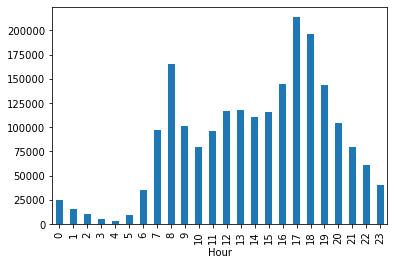

In [128]:
dfTreinamentoNovo.groupby('Hour')['count'].sum().plot(kind='bar')

### Hipótese 2 - O valor médio de alugueis de usuários registrados é maior nos dias úteis.

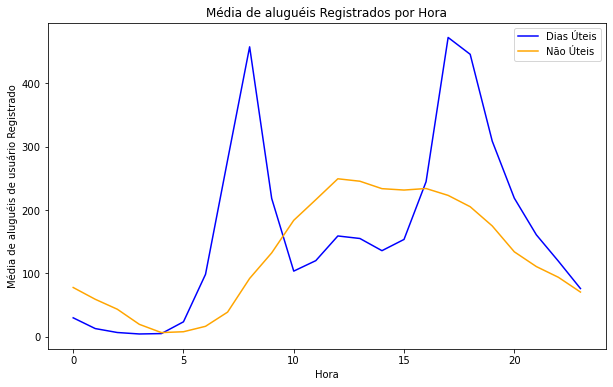

In [129]:
dados_dia_util = dfTreinamentoNovo[dfTreinamentoNovo['WorkingDay'] == 1]
dados_nao_util = dfTreinamentoNovo[dfTreinamentoNovo['WorkingDay'] == 0]

plt.figure(figsize=(10, 6))

plt.plot(dados_dia_util.groupby('Hour')['Registered'].mean(), label='Dias Úteis', color='blue')
plt.plot(dados_nao_util.groupby('Hour')['Registered'].mean(), label='Não Úteis', color='orange')

plt.xlabel('Hora')
plt.ylabel('Média de aluguéis de usuário Registrado')
plt.title('Média de aluguéis Registrados por Hora')

plt.legend()
plt.show()

### Hipótese 3 - O valor médio de aluguéis de usuário registrado na Primavera é menor que nas outras estações.

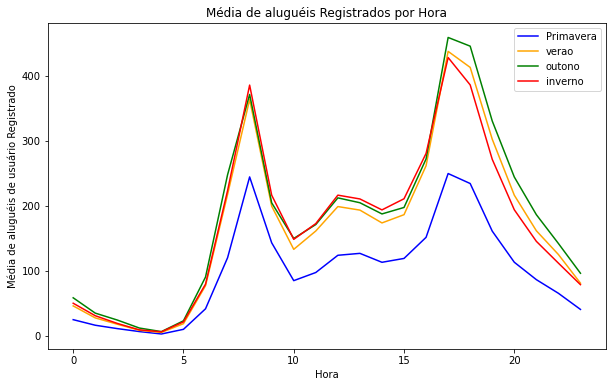

In [130]:
primavera = dfTreinamentoNovo[dfTreinamentoNovo['Seasons'] == 1]
verao = dfTreinamentoNovo[dfTreinamentoNovo['Seasons'] == 2]
outono = dfTreinamentoNovo[dfTreinamentoNovo['Seasons'] == 3]
inverno = dfTreinamentoNovo[dfTreinamentoNovo['Seasons'] == 4]

plt.figure(figsize=(10, 6))

plt.plot(primavera.groupby('Hour')['Registered'].mean(), label='Primavera', color='blue')
plt.plot(verao.groupby('Hour')['Registered'].mean(), label='verao', color='orange')
plt.plot(outono.groupby('Hour')['Registered'].mean(), label='outono', color='green')
plt.plot(inverno.groupby('Hour')['Registered'].mean(), label='inverno', color='red')

plt.xlabel('Hora')
plt.ylabel('Média de aluguéis de usuário Registrado')
plt.title('Média de aluguéis Registrados por Hora')

plt.legend()
plt.show()

# Verificação de Distribuição e Assimetria

In [131]:
dfTreinamentoNovo.columns

Index(['datetime', 'Year', 'Month', 'Day', 'DayName', 'DayNumber', 'Hour',
       'Weather', 'Temperature', 'Humidity', 'Wind_Speed', 'Seasons',
       'Holiday', 'WorkingDay', 'count', 'Casual', 'Registered', 'Hour_Sin',
       'Hour_Cos', 'DayName_Sin', 'DayName_Cos', 'Day_Period', 'Rush_Hour'],
      dtype='object')

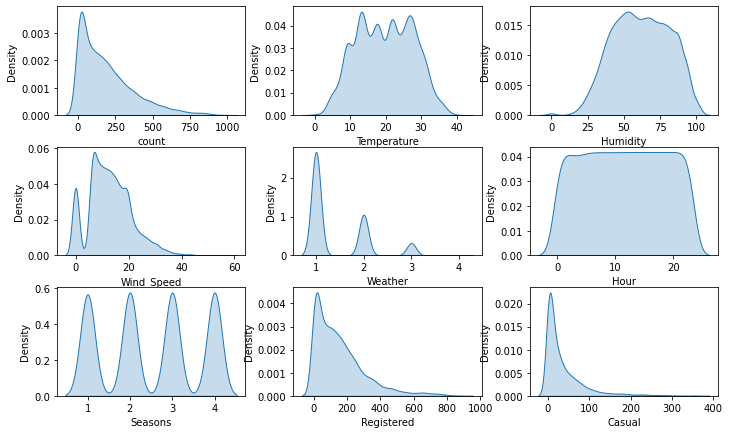

In [132]:
figure, axes = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(10,6)
figure.tight_layout()
sns.kdeplot(dfTreinamentoNovo['count'], shade=True, ax=axes[0][0]);
sns.kdeplot(dfTreinamentoNovo['Temperature'], shade=True, ax=axes[0][1]);
sns.kdeplot(dfTreinamentoNovo['Humidity'], shade=True, ax=axes[0][2]);
sns.kdeplot(dfTreinamentoNovo['Wind_Speed'], shade=True, ax=axes[1][0]);
sns.kdeplot(dfTreinamentoNovo['Weather'], shade=True, ax=axes[1][1]);
sns.kdeplot(dfTreinamentoNovo['Hour'], shade=True, ax=axes[1][2]);
sns.kdeplot(dfTreinamentoNovo['Seasons'], shade=True, ax=axes[2][0]);
sns.kdeplot(dfTreinamentoNovo['Registered'], shade=True, ax=axes[2][1]);
sns.kdeplot(dfTreinamentoNovo['Casual'], shade=True, ax=axes[2][2]);

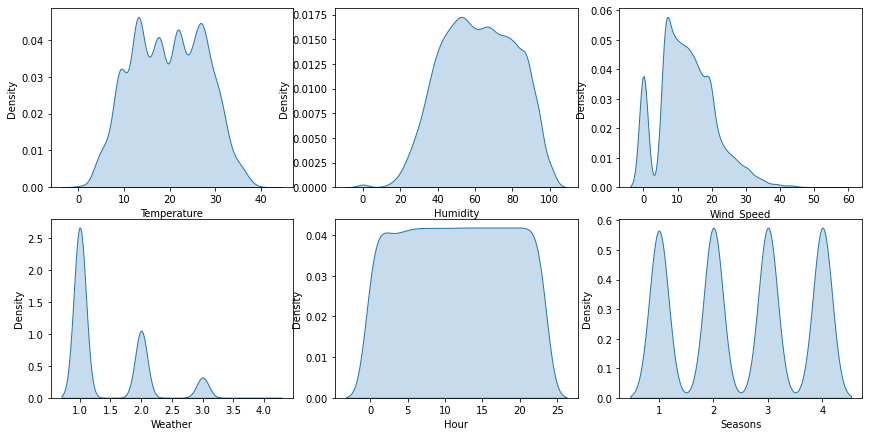

In [133]:
figure, axes = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(12,6)
figure.tight_layout()
sns.kdeplot(dfTreinamentoNovo['Temperature'], shade=True, ax=axes[0][0]);
sns.kdeplot(dfTreinamentoNovo['Humidity'], shade=True, ax=axes[0][1]);
sns.kdeplot(dfTreinamentoNovo['Wind_Speed'], shade=True, ax=axes[0][2]);
sns.kdeplot(dfTreinamentoNovo['Weather'], shade=True, ax=axes[1][0]);
sns.kdeplot(dfTreinamentoNovo['Hour'], shade=True, ax=axes[1][1]);
sns.kdeplot(dfTreinamentoNovo['Seasons'], shade=True, ax=axes[1][2]);

In [134]:
dfTreinamentoNovo['logcount'] = dfTreinamentoNovo['count'].apply(np.log1p)
dfTreinamentoNovo['sqrtcount'] = dfTreinamentoNovo['count'].apply(np.sqrt)
dfTreinamentoNovo['squartcount'] = np.power(dfTreinamentoNovo['count'],2)

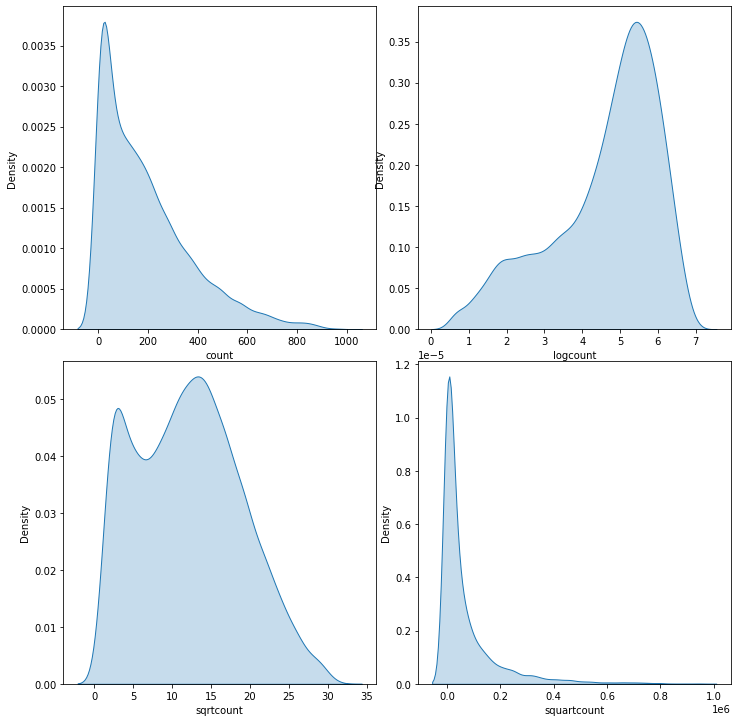

In [135]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10,10)
figure.tight_layout()
sns.kdeplot(dfTreinamentoNovo['count'], shade=True, ax=axes[0][0]);
sns.kdeplot(dfTreinamentoNovo['logcount'], shade=True, ax=axes[0][1]);
sns.kdeplot(dfTreinamentoNovo['sqrtcount'], shade=True, ax=axes[1][0]);
sns.kdeplot(dfTreinamentoNovo['squartcount'], shade=True, ax=axes[1][1]);

In [136]:
dfTreinamentoNovo['logWind_Speed'] = dfTreinamentoNovo['Wind_Speed'].apply(np.log1p)
dfTreinamentoNovo['sqrtWind_Speed'] = dfTreinamentoNovo['Wind_Speed'].apply(np.sqrt)
dfTreinamentoNovo['squartWind_Speed'] = np.power(dfTreinamentoNovo['Wind_Speed'],2)

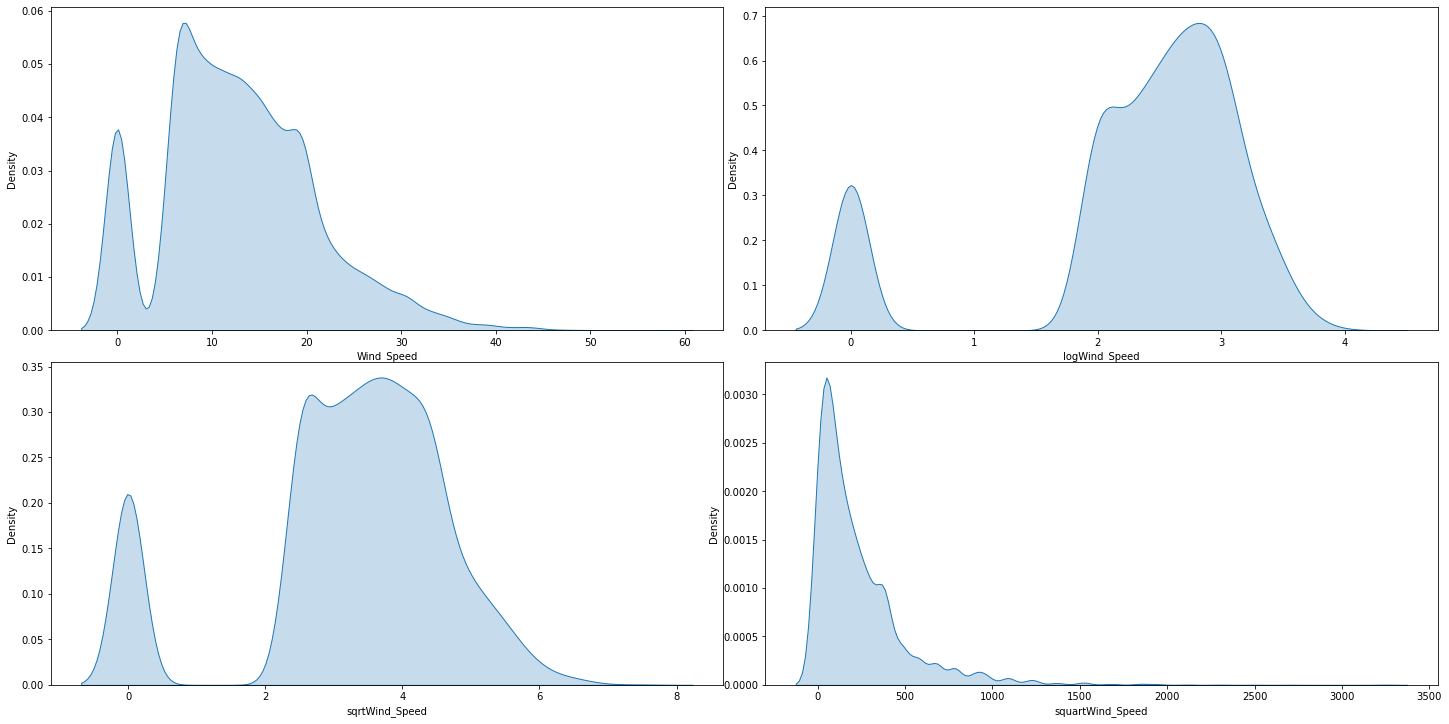

In [137]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,10)
figure.tight_layout()
sns.kdeplot(dfTreinamentoNovo['Wind_Speed'], shade=True, ax=axes[0][0]);
sns.kdeplot(dfTreinamentoNovo['logWind_Speed'], shade=True, ax=axes[0][1]);
sns.kdeplot(dfTreinamentoNovo['sqrtWind_Speed'], shade=True, ax=axes[1][0]);
sns.kdeplot(dfTreinamentoNovo['squartWind_Speed'], shade=True, ax=axes[1][1]);

In [138]:
dfTreinamentoNovo.drop(columns=['logcount', 'squartcount', 'sqrtWind_Speed', 'logWind_Speed', 'squartWind_Speed'], inplace=True)
dfTreinamentoNovo.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Day_Period,Rush_Hour,sqrtcount
0,2011-01-01 00:00:00,0,1,1,Saturday,5,0,1,9,81,0.0,1,0,0,16,3,13,0.000000,1.000000,0.974928,-0.222521,Morning,0,4.000000
1,2011-01-01 01:00:00,0,1,1,Saturday,5,1,1,9,80,0.0,1,0,0,40,8,32,0.258819,0.965926,0.974928,-0.222521,Morning,0,6.324555
2,2011-01-01 02:00:00,0,1,1,Saturday,5,2,1,9,80,0.0,1,0,0,32,5,27,0.500000,0.866025,0.974928,-0.222521,Morning,0,5.656854
3,2011-01-01 03:00:00,0,1,1,Saturday,5,3,1,9,75,0.0,1,0,0,13,3,10,0.707107,0.707107,0.974928,-0.222521,Morning,0,3.605551
4,2011-01-01 04:00:00,0,1,1,Saturday,5,4,1,9,75,0.0,1,0,0,1,0,1,0.866025,0.500000,0.974928,-0.222521,Morning,0,1.000000


In [139]:
dfTreinamentoNovo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     10886 non-null  object 
 1   Year         10886 non-null  int64  
 2   Month        10886 non-null  int64  
 3   Day          10886 non-null  int64  
 4   DayName      10886 non-null  object 
 5   DayNumber    10886 non-null  int64  
 6   Hour         10886 non-null  int64  
 7   Weather      10886 non-null  int64  
 8   Temperature  10886 non-null  int32  
 9   Humidity     10886 non-null  int64  
 10  Wind_Speed   10886 non-null  float64
 11  Seasons      10886 non-null  int64  
 12  Holiday      10886 non-null  int64  
 13  WorkingDay   10886 non-null  int64  
 14  count        10886 non-null  int64  
 15  Casual       10886 non-null  int64  
 16  Registered   10886 non-null  int64  
 17  Hour_Sin     10886 non-null  float64
 18  Hour_Cos     10886 non-null  float64
 19  DayN

# Correlação

<AxesSubplot:>

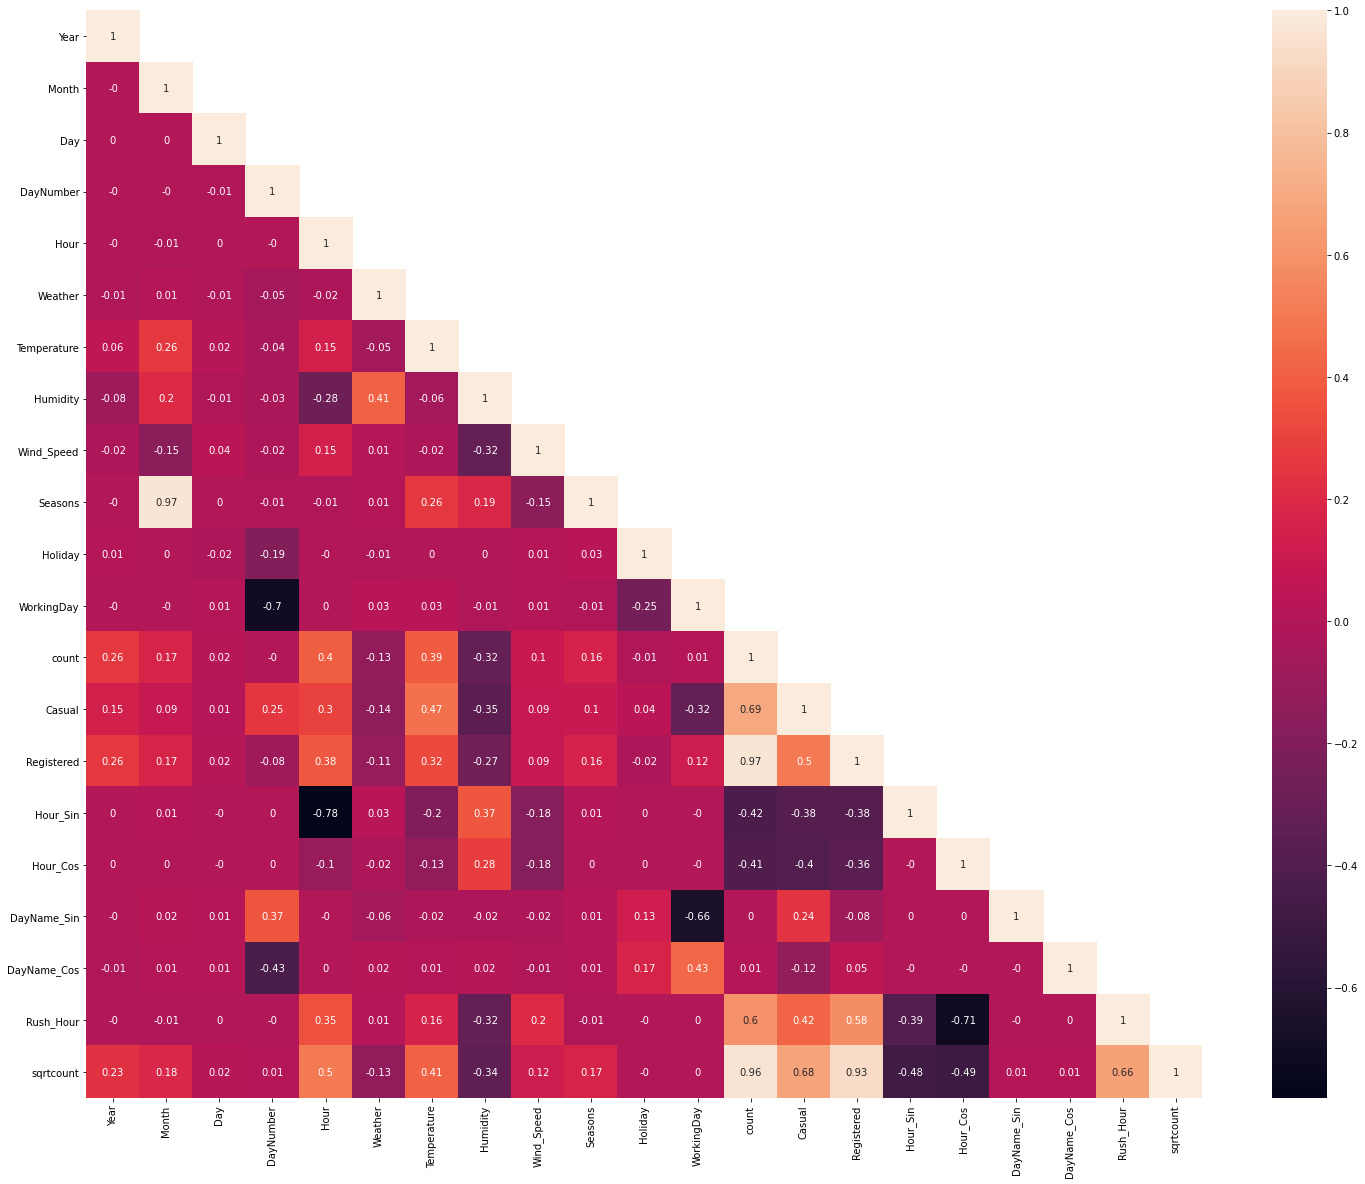

In [140]:
corr_matrix = dfTreinamentoNovo.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(25,20))
sns.heatmap(np.round(corr_matrix,2), mask=mask, annot=True)

In [141]:
abs(dfTreinamentoNovo.corr()['count']).sort_values(ascending=False)

count          1.000000
Registered     0.970948
sqrtcount      0.960909
Casual         0.690414
Rush_Hour      0.598600
Hour_Sin       0.418138
Hour_Cos       0.413897
Hour           0.400601
Temperature    0.394003
Humidity       0.317371
Year           0.260403
Month          0.166862
Seasons        0.163439
Weather        0.128655
Wind_Speed     0.101369
Day            0.019826
WorkingDay     0.011594
DayName_Cos    0.008248
Holiday        0.005393
DayNumber      0.002283
DayName_Sin    0.001310
Name: count, dtype: float64

# Verificar Outliers

In [142]:
def zscore(series):

    return (series-series.mean())/series.std()

dfTreinamentoNovo_O = dfTreinamentoNovo.copy()
dfTreinamentoNovo_O['count_score'] = dfTreinamentoNovo.groupby(['Hour', 'WorkingDay'])['count'].transform(zscore)
indices_outlier = np.abs(dfTreinamentoNovo_O['count_score']) > 3
dados_outlier = dfTreinamentoNovo_O.loc[indices_outlier, :]
print(dados_outlier.shape)
dados_outlier

(41, 25)


,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Day_Period,Rush_Hour,sqrtcount,count_score
1802,2011-05-02 00:00:00,0,5,2,Monday,0,0,1,18,72,8.9981,2,0,1,177,68,109,0.000000e+00,1.000000e+00,0.781831,0.623490,Morning,0,13.304135,5.328782
1803,2011-05-02 01:00:00,0,5,2,Monday,0,1,1,18,72,8.9981,2,0,1,114,41,73,2.588190e-01,9.659258e-01,0.781831,0.623490,Morning,0,10.677078,7.899886
1804,2011-05-02 02:00:00,0,5,2,Monday,0,2,2,18,77,15.0013,2,0,1,35,16,19,5.000000e-01,8.660254e-01,0.781831,0.623490,Morning,0,5.916080,3.817596
1805,2011-05-02 03:00:00,0,5,2,Monday,0,3,1,18,77,8.9981,2,0,1,16,9,7,7.071068e-01,7.071068e-01,0.781831,0.623490,Morning,0,4.000000,3.657767
1806,2011-05-02 04:00:00,0,5,2,Monday,0,4,1,18,77,11.0014,2,0,1,17,9,8,8.660254e-01,5.000000e-01,0.781831,0.623490,Morning,0,4.123106,3.579145
2783,2011-07-04 21:00:00,0,7,4,Monday,0,21,2,30,62,7.0015,3,1,0,457,195,262,-7.071068e-01,7.071068e-01,0.781831,0.623490,Evening,0,21.377558,3.520304
3028,2011-07-15 02:00:00,0,7,15,Friday,4,2,1,24,78,11.0014,3,0,1,38,16,22,5.000000e-01,8.660254e-01,0.000000,1.000000,Morning,0,6.164414,4.248737
3845,2011-09-11 05:00:00,0,9,11,Sunday,6,5,1,24,83,8.9981,3,0,0,39,15,24,9.659258e-01,2.588190e-01,0.433884,-0.900969,Morning,0,6.244998,3.936370
6572,2012-03-11 03:00:00,1,3,11,Sunday,6,3,1,9,60,8.9981,1,0,0,66,15,51,7.071068e-01,7.071068e-01,0.433884,-0.900969,Morning,0,8.124038,3.018343
6791,2012-04-01 06:00:00,1,4,1,Sunday,6,6,2,14,76,8.9981,2,0,0,97,9,88,1.000000e+00,6.123234e-17,0.433884,-0.900969,Morning,0,9.848858,4.227851


In [143]:
dfTreinamentoNovo_Wo = dfTreinamentoNovo_O.loc[~indices_outlier, :]
print(dfTreinamentoNovo_Wo.shape)
print(dfTreinamentoNovo_O.shape)

(10845, 25)
(10886, 25)


# Manipulação das Colunas Categóricas

In [144]:
dfTreinamentoEncoded_Dummies = dfTreinamentoNovo.copy()
dfTesteEncoded_Dummies = dfTesteNovo.copy()

In [145]:
dfTreinamentoEncoded_Dummies = pd.get_dummies(dfTreinamentoEncoded_Dummies, columns=['Day_Period'], drop_first=True)
dfTesteEncoded_Dummies = pd.get_dummies(dfTesteEncoded_Dummies, columns=['Day_Period'], drop_first=True)

In [146]:
dfTreinamentoEncoded_Dummies[(dfTreinamentoEncoded_Dummies['Day_Period_Evening']==0) & (dfTreinamentoEncoded_Dummies['Day_Period_Morning']==0) & (dfTreinamentoEncoded_Dummies['Day_Period_Night']==0)]

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Rush_Hour,sqrtcount,Day_Period_Evening,Day_Period_Morning,Day_Period_Night
12,2011-01-01 12:00:00,0,1,1,Saturday,5,12,1,17,77,19.0012,1,0,0,84,29,55,1.224647e-16,-1.000000,0.974928,-0.222521,1,9.165151,0,0,0
13,2011-01-01 13:00:00,0,1,1,Saturday,5,13,2,18,72,19.9995,1,0,0,94,47,47,-2.588190e-01,-0.965926,0.974928,-0.222521,1,9.695360,0,0,0
14,2011-01-01 14:00:00,0,1,1,Saturday,5,14,2,18,72,19.0012,1,0,0,106,35,71,-5.000000e-01,-0.866025,0.974928,-0.222521,1,10.295630,0,0,0
15,2011-01-01 15:00:00,0,1,1,Saturday,5,15,2,18,77,19.9995,1,0,0,110,40,70,-7.071068e-01,-0.707107,0.974928,-0.222521,1,10.488088,0,0,0
16,2011-01-01 16:00:00,0,1,1,Saturday,5,16,2,17,82,19.9995,1,0,0,93,41,52,-8.660254e-01,-0.500000,0.974928,-0.222521,1,9.643651,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10875,2012-12-19 13:00:00,1,12,19,Wednesday,2,13,1,17,50,12.9980,4,0,1,213,30,183,-2.588190e-01,-0.965926,-0.781831,0.623490,1,14.594520,0,0,0
10876,2012-12-19 14:00:00,1,12,19,Wednesday,2,14,1,17,50,12.9980,4,0,1,218,33,185,-5.000000e-01,-0.866025,-0.781831,0.623490,1,14.764823,0,0,0
10877,2012-12-19 15:00:00,1,12,19,Wednesday,2,15,1,17,50,19.0012,4,0,1,237,28,209,-7.071068e-01,-0.707107,-0.781831,0.623490,1,15.394804,0,0,0
10878,2012-12-19 16:00:00,1,12,19,Wednesday,2,16,1,17,50,23.9994,4,0,1,334,37,297,-8.660254e-01,-0.500000,-0.781831,0.623490,1,18.275667,0,0,0


### Label Encoding

In [147]:
dfTreinamentoEncoded_Labels = dfTreinamentoNovo.copy()
dfTesteEnconded_Labels = dfTesteNovo.copy()

In [148]:
class MultiColunasLabelEncoder:

    def __init__(self, columns = None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        saida = X.copy()
        if self.columns is not None:
            for col in self.columns:
                saida[col] = LabelEncoder().fit_transform(saida[col])
        else:
            for colnome, col in saida.iteritems():
                saida[colnome] = LabelEncoder().fit_transform(col)
        return saida

    def fit_transform(self, X, y=None):

        return self.fit(X,y).transform(X)

In [149]:
dfTreinamentoEncoded_Labels = MultiColunasLabelEncoder(columns=['Day_Period']).fit_transform(dfTreinamentoEncoded_Labels)
dfTesteEnconded_Labels = MultiColunasLabelEncoder(columns=['Day_Period']).fit_transform(dfTesteEnconded_Labels)

In [150]:
dfTreinamentoEncoded_Labels.head()

,datetime,Year,Month,Day,DayName,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,count,Casual,Registered,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Day_Period,Rush_Hour,sqrtcount
0,2011-01-01 00:00:00,0,1,1,Saturday,5,0,1,9,81,0.0,1,0,0,16,3,13,0.000000,1.000000,0.974928,-0.222521,2,0,4.000000
1,2011-01-01 01:00:00,0,1,1,Saturday,5,1,1,9,80,0.0,1,0,0,40,8,32,0.258819,0.965926,0.974928,-0.222521,2,0,6.324555
2,2011-01-01 02:00:00,0,1,1,Saturday,5,2,1,9,80,0.0,1,0,0,32,5,27,0.500000,0.866025,0.974928,-0.222521,2,0,5.656854
3,2011-01-01 03:00:00,0,1,1,Saturday,5,3,1,9,75,0.0,1,0,0,13,3,10,0.707107,0.707107,0.974928,-0.222521,2,0,3.605551
4,2011-01-01 04:00:00,0,1,1,Saturday,5,4,1,9,75,0.0,1,0,0,1,0,1,0.866025,0.500000,0.974928,-0.222521,2,0,1.000000


In [151]:
dfTreinamentoEncoded_Labels['Day_Period'].unique()

array([2, 0, 1, 3])

In [152]:
abs(dfTreinamentoEncoded_Labels.corr()['count']).sort_values()

DayName_Sin    0.001310
DayNumber      0.002283
Holiday        0.005393
DayName_Cos    0.008248
WorkingDay     0.011594
Day            0.019826
Wind_Speed     0.101369
Weather        0.128655
Seasons        0.163439
Month          0.166862
Year           0.260403
Humidity       0.317371
Temperature    0.394003
Hour           0.400601
Hour_Cos       0.413897
Hour_Sin       0.418138
Day_Period     0.444719
Rush_Hour      0.598600
Casual         0.690414
sqrtcount      0.960909
Registered     0.970948
count          1.000000
Name: count, dtype: float64

# Normalização

In [153]:
dfTrain = dfTreinamentoEncoded_Dummies.drop(columns=['Casual', 'Registered', 'sqrtcount', 'DayName'])

In [154]:
dfTest = dfTesteEncoded_Dummies.drop(columns=['DayName'])

In [155]:
def normalizar(df):

    resultado = df.copy()
    for atributo in df.columns:
        valor_max = df[atributo].max()
        valor_min = df[atributo].min()
        resultado[atributo] = (df[atributo] - valor_min)/(valor_max - valor_min)
    return resultado

In [156]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(dfTrain, test_size=0.2, random_state=42, stratify=None)

X_train = train_df.drop(columns=['datetime', 'count'])
y_train = train_df['count']

X_val = val_df.drop(columns=['datetime', 'count'])
y_val = val_df['count']

In [157]:
# y_val.shape

In [158]:
y_trainLog = np.log1p(y_train)
y_valLog = np.log1p(y_val)

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_val = scaler.transform(X_val.values)

In [160]:
#!pip install xgboost

In [161]:
#!pip install catboost

In [162]:
#!pip install lightgbm

# Modelo ML

In [163]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [164]:
def rmsle(y_true, y_pred, convertExp=True):

    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))

    saida = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return saida

In [165]:
models = {
    "LinearRegression":            LinearRegression(),
    "Ridge":                       Ridge(),
    "Lasso":                       Lasso(),
    "ElasticNet":                  ElasticNet(),
    "KNeighborsRegressor":         KNeighborsRegressor(),
    "DecisionTreeRegressor":       DecisionTreeRegressor(),
    "RandomForestRegressor":       RandomForestRegressor(),
    "BaggingRegressor":            BaggingRegressor(),
    "AdaBoostRegressor":           AdaBoostRegressor(),
    "CatBoostRegressor":           CatBoostRegressor(verbose=False),
    "LGBMRegressor":               LGBMRegressor(),
    "GradientBoostingRegressor":   GradientBoostingRegressor(),
    "XGBRegressor":                XGBRegressor()
}

In [166]:
for nome, modelo in models.items():
    print(f'Utilizando o modelo: {nome}')
    modelo.fit(X_train, y_trainLog)
    print(f'Score do treinamento {modelo.score(X_train, y_trainLog)}')
    print(f'RMSLETrain: {rmsle(y_trainLog, modelo.predict(X_train))}')
    print(f'RMSLEVal: {rmsle(y_valLog, modelo.predict(X_val))}')
    print('====================================================================')

Utilizando o modelo: LinearRegression
Score do treinamento 0.718613359624056
RMSLETrain: 0.7197613280801549
RMSLEVal: 0.727121355255337
Utilizando o modelo: Ridge
Score do treinamento 0.7186132647285624
RMSLETrain: 0.7197523086802348
RMSLEVal: 0.7271049249910089
Utilizando o modelo: Lasso
Score do treinamento 0.0
RMSLETrain: 1.3650761395305935
RMSLEVal: 1.3821001010252922
Utilizando o modelo: ElasticNet
Score do treinamento 0.3038174745480179
RMSLETrain: 1.1325891162609516
RMSLEVal: 1.1517023389592107
Utilizando o modelo: KNeighborsRegressor


Score do treinamento 0.8767012702384931
RMSLETrain: 0.47174012673170046
RMSLEVal: 0.5783588777745842
Utilizando o modelo: DecisionTreeRegressor
Score do treinamento 1.0
RMSLETrain: 9.215664269041835e-18
RMSLEVal: 0.4012556780714963
Utilizando o modelo: RandomForestRegressor
Score do treinamento 0.9936843166372183
RMSLETrain: 0.10487517479230632
RMSLEVal: 0.2852642508409088
Utilizando o modelo: BaggingRegressor
Score do treinamento 0.9909171308696236
RMSLETrain: 0.12681291720162452
RMSLEVal: 0.2946248241169651
Utilizando o modelo: AdaBoostRegressor
Score do treinamento 0.8004204447805361
RMSLETrain: 0.6108142967629422
RMSLEVal: 0.6169676684992083
Utilizando o modelo: CatBoostRegressor
Score do treinamento 0.9815888589720408
RMSLETrain: 0.17876774101263068
RMSLEVal: 0.2500774423560517
Utilizando o modelo: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if me

In [167]:
datetime = dfTest['datetime']
X_test = dfTest.drop(columns=['datetime'])
X_test = scaler.transform(X_test)

In [168]:
modelo = RandomForestRegressor()

In [169]:
tree_params = {"max_depth": np.arange(3, 10),
               "criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
               "min_samples_split": np.arange(2, 5),
               "min_samples_leaf": np.arange(2, 5),
              }
tree_params

{'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'min_samples_split': array([2, 3, 4]),
 'min_samples_leaf': array([2, 3, 4])}

In [170]:
n_iter_search = 300

random_search = RandomizedSearchCV(modelo, # modelo
                                   param_distributions=tree_params, # Parametros que criamos,
                                   n_iter=n_iter_search, # É interessante incrementar esse valor para que mais permutações sejam testadas
                                   random_state=42)

In [171]:
start = time()

random_search.fit(X_train, y_trainLog)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings \n\n" % ((time() - start), n_iter_search))

RandomizedSearchCV took 975.09 seconds for 300 candidates parameter settings 




In [172]:
random_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'criterion': 'friedman_mse'}

In [173]:
random_search.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=9, min_samples_leaf=2,
                      min_samples_split=4)

In [174]:
modelo_random = random_search.best_estimator_

In [175]:
modelo_random.fit(X_train, y_trainLog)
print(f'RMSLETrain: {rmsle(y_trainLog, modelo_random.predict(X_train))}')
print(f'RMSLETrain: {rmsle(y_valLog, modelo_random.predict(X_val))}')

RMSLETrain: 0.286958603557137
RMSLETrain: 0.33922161992222055


In [176]:
y_test_predicao = modelo_random.predict(X_test)

dfTest['count'] = np.floor(np.exp(y_test_predicao)).astype(int)
yPredTest = dfTest['count']

In [177]:
X_test[0]

array([-1.00322062, -1.60874025,  1.83712513, -0.00953327, -1.66831646,
       -0.65728558, -1.25559716, -0.30130286,  1.61067143, -1.35191223,
       -0.17333479,  0.68444534,  0.0068723 ,  1.41755794, -0.61742325,
       -1.26681405, -1.09169346, -0.44715197,  1.00645168, -0.30474823])

In [178]:
yPredTest

0        13
1         6
2         4
3         3
4         3
       ... 
6488    319
6489    241
6490    151
6491    111
6492     69
Name: count, Length: 6493, dtype: int32

In [179]:
dfTest.drop(columns='datetime', inplace=True)
dfTest = pd.concat([dfTest, datetime], axis=1)
dfTest.head(50)

,Year,Month,Day,DayNumber,Hour,Weather,Temperature,Humidity,Wind_Speed,Seasons,Holiday,WorkingDay,Hour_Sin,Hour_Cos,DayName_Sin,DayName_Cos,Rush_Hour,Day_Period_Evening,Day_Period_Morning,Day_Period_Night,count,datetime
0,0,1,20,3,0,1,10,56,26.0027,1,0,1,0.000000e+00,1.000000e+00,-0.433884,-0.900969,0,0,1,0,13,2011-01-20 00:00:00
1,0,1,20,3,1,1,10,56,0.0000,1,0,1,2.588190e-01,9.659258e-01,-0.433884,-0.900969,0,0,1,0,6,2011-01-20 01:00:00
2,0,1,20,3,2,1,10,56,0.0000,1,0,1,5.000000e-01,8.660254e-01,-0.433884,-0.900969,0,0,1,0,4,2011-01-20 02:00:00
3,0,1,20,3,3,1,10,56,11.0014,1,0,1,7.071068e-01,7.071068e-01,-0.433884,-0.900969,0,0,1,0,3,2011-01-20 03:00:00
4,0,1,20,3,4,1,10,56,11.0014,1,0,1,8.660254e-01,5.000000e-01,-0.433884,-0.900969,0,0,1,0,3,2011-01-20 04:00:00
5,0,1,20,3,5,1,9,60,15.0013,1,0,1,9.659258e-01,2.588190e-01,-0.433884,-0.900969,0,0,1,0,6,2011-01-20 05:00:00
6,0,1,20,3,6,1,9,60,15.0013,1,0,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969,0,0,1,0,36,2011-01-20 06:00:00
7,0,1,20,3,7,1,9,55,15.0013,1,0,1,9.659258e-01,-2.588190e-01,-0.433884,-0.900969,1,0,1,0,98,2011-01-20 07:00:00
8,0,1,20,3,8,1,9,55,19.0012,1,0,1,8.660254e-01,-5.000000e-01,-0.433884,-0.900969,1,0,1,0,113,2011-01-20 08:00:00
9,0,1,20,3,9,2,9,52,15.0013,1,0,1,7.071068e-01,-7.071068e-01,-0.433884,-0.900969,1,0,1,0,98,2011-01-20 09:00:00
